# 서울시 유가 정보 분석

In [1]:
import pandas as pd
#파일합치기 
from glob import glob

In [3]:
station_files = glob("../Data/Oil/*.xls")
station_files

['../Data/Oil/지역_위치별(주유소) (9).xls',
 '../Data/Oil/지역_위치별(주유소) (12).xls',
 '../Data/Oil/지역_위치별(주유소) (5).xls',
 '../Data/Oil/지역_위치별(주유소) (24).xls',
 '../Data/Oil/지역_위치별(주유소) (4).xls',
 '../Data/Oil/지역_위치별(주유소) (13).xls',
 '../Data/Oil/지역_위치별(주유소) (8).xls',
 '../Data/Oil/지역_위치별(주유소) (3).xls',
 '../Data/Oil/지역_위치별(주유소) (18).xls',
 '../Data/Oil/지역_위치별(주유소) (22).xls',
 '../Data/Oil/지역_위치별(주유소) (14).xls',
 '../Data/Oil/지역_위치별(주유소) (15).xls',
 '../Data/Oil/지역_위치별(주유소) (23).xls',
 '../Data/Oil/지역_위치별(주유소) (19).xls',
 '../Data/Oil/지역_위치별(주유소) (2).xls',
 '../Data/Oil/지역_위치별(주유소) (20).xls',
 '../Data/Oil/지역_위치별(주유소) (1).xls',
 '../Data/Oil/지역_위치별(주유소) (16).xls',
 '../Data/Oil/지역_위치별(주유소) (17).xls',
 '../Data/Oil/지역_위치별(주유소) (21).xls',
 '../Data/Oil/지역_위치별(주유소) (10).xls',
 '../Data/Oil/지역_

In [4]:
tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name,header=2)  # 2행은 헤더로 
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [8]:
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),S-OIL,02-992-0220,Y,-,2097,2097,-
1,서울특별시,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),현대오일뱅크,02-954-4555,Y,2305,2097,2097,-
2,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,2097,2097,1650
3,서울특별시,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),S-OIL,02-3491-3454,Y,-,2097,2097,-
4,서울특별시,동일석유(주) 창동주유소,서울 도봉구 도봉로 434 (창동),SK에너지,02-902-5544,Y,-,2107,2097,-
...,...,...,...,...,...,...,...,...,...,...
4,서울특별시,현대오일뱅크㈜직영 신대방셀프주유소,서울 동작구 시흥대로 616 (신대방동),현대오일뱅크,02-832-7926,Y,2269,2139,2159,-
5,서울특별시,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),현대오일뱅크,02-815-0724,Y,2307,2139,2149,-
6,서울특별시,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),현대오일뱅크,02-817-9179,N,2299,2149,2159,-
7,서울특별시,매일주유소,서울 동작구 상도로 139 (상도동),S-OIL,02-817-4085,Y,-,2199,2199,1700


In [6]:
len(station_raw)

456

In [7]:
station_raw.info()
# 고급휘발유 ~ 실내등유까지 가격이니 숫자로 반환 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      456 non-null    object
 1   상호      456 non-null    object
 2   주소      456 non-null    object
 3   상표      456 non-null    object
 4   전화번호    456 non-null    object
 5   셀프여부    456 non-null    object
 6   고급휘발유   456 non-null    object
 7   휘발유     456 non-null    object
 8   경유      456 non-null    object
 9   실내등유    456 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [10]:
# 필요항목 발췌
stations = pd.DataFrame({'Oil_store' : station_raw['상호'],
                        '주소' : station_raw['주소'],
                        '휘발유가격' : station_raw['휘발유'],
                        '셀프' : station_raw['셀프여부'],
                        '상표' : station_raw['상표'],

})
stations.head()

,Oil_store,주소,휘발유가격,셀프,상표
0,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),2097,Y,S-OIL
1,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),2097,Y,현대오일뱅크
2,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),2097,N,현대오일뱅크
3,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),2097,Y,S-OIL
4,동일석유(주) 창동주유소,서울 도봉구 도봉로 434 (창동),2107,Y,SK에너지


In [11]:
# 서울특별시를 서울로 이름을 맞추기 
stations['주소'] = stations['주소'].str.replace('서울특별시','서울')
stations.head()

,Oil_store,주소,휘발유가격,셀프,상표
0,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),2097,Y,S-OIL
1,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),2097,Y,현대오일뱅크
2,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),2097,N,현대오일뱅크
3,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),2097,Y,S-OIL
4,동일석유(주) 창동주유소,서울 도봉구 도봉로 434 (창동),2107,Y,SK에너지


In [12]:
# 주유소별 자치구 항목 추가 
stations['구'] = [region.split()[1] for region in stations['주소']]

In [13]:
stations['구'].unique()

array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
       '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
       '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object)

In [14]:
stations.head()

,Oil_store,주소,휘발유가격,셀프,상표,구
0,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),2097,Y,S-OIL,도봉구
1,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),2097,Y,현대오일뱅크,도봉구
2,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),2097,N,현대오일뱅크,도봉구
3,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),2097,Y,S-OIL,도봉구
4,동일석유(주) 창동주유소,서울 도봉구 도봉로 434 (창동),2107,Y,SK에너지,도봉구


In [16]:
# 가격 정보가 '-'인곳
stations[stations.휘발유가격 == "-"]

,Oil_store,주소,휘발유가격,셀프,상표,구
14,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
15,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
29,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
11,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
20,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [20]:
# 여러개의 파일을 합하여 만든 데이터셋이기 때문에 index가 중복되어 있는 것을 볼 수 있다.
# 인덱스를 재배열
stations.reset_index(drop=True,inplace=True)

In [23]:
stations[stations['휘발유가격'].isnull()]

,index,Oil_store,주소,휘발유가격,셀프,상표,구


In [25]:
removeIndex = stations[stations.휘발유가격 == "-"].index

In [26]:
stations.drop(removeIndex, axis='index',inplace=True)
len(stations)

447

In [27]:
stations[stations.휘발유가격 == "-"]

,index,Oil_store,주소,휘발유가격,셀프,상표,구


In [28]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      447 non-null    int64 
 1   Oil_store  447 non-null    object
 2   주소         447 non-null    object
 3   휘발유가격      447 non-null    object
 4   셀프         447 non-null    object
 5   상표         447 non-null    object
 6   구          447 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.9+ KB


In [29]:
# 가격 컬럼의 type 변환
stations = stations.astype({'휘발유가격':'int'})
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      447 non-null    int64 
 1   Oil_store  447 non-null    object
 2   주소         447 non-null    object
 3   휘발유가격      447 non-null    int64 
 4   셀프         447 non-null    object
 5   상표         447 non-null    object
 6   구          447 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.9+ KB


In [31]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

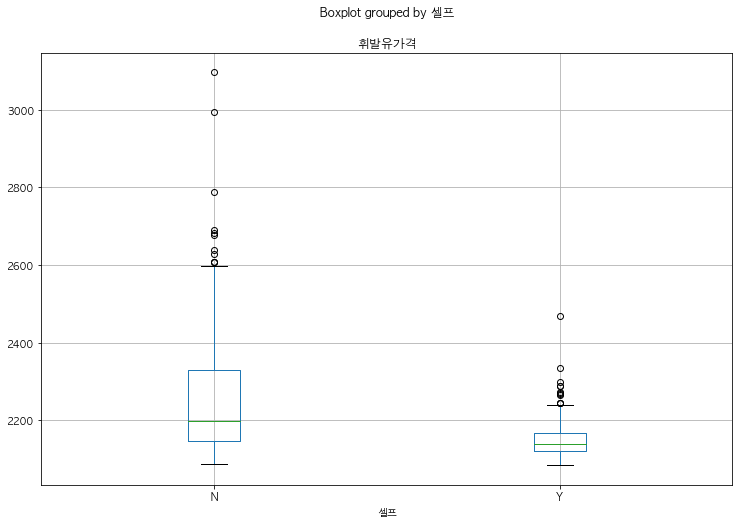

In [34]:
# boxplot 그리기
stations.boxplot(column='휘발유가격',by="셀프",figsize=(12,8))
# by => x 축, column => y축
plt.show()

In [35]:
import seaborn as sns

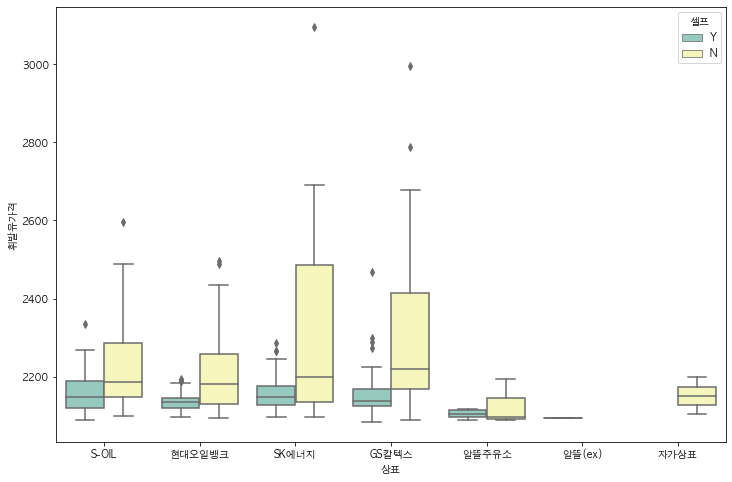

In [43]:
# 상표, 가격, 셀프를 boxplot으로 그리기 
plt.figure(figsize=(12,8))

sns.boxplot(
    x='상표',
    y='휘발유가격',
    hue='셀프',
    data=stations,
    palette='Set3'
    )

plt.show()

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


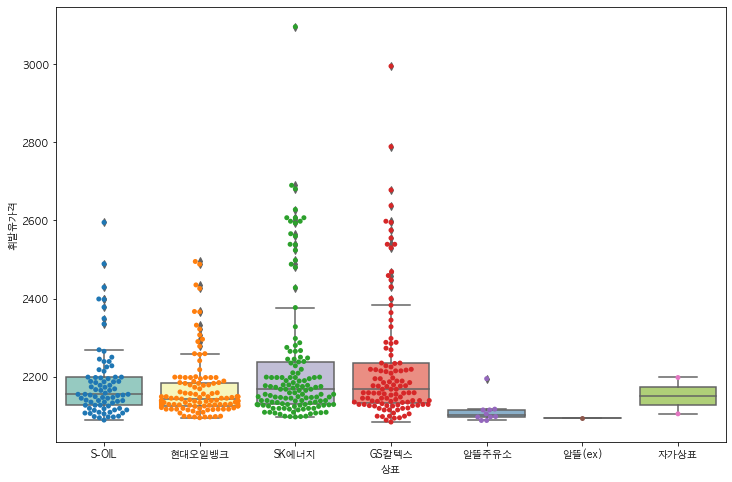

In [44]:
# 상표, 가격, 셀프를 boxplot으로 그리기 
plt.figure(figsize=(12,8))

sns.boxplot(
    x='상표',
    y='휘발유가격',
    data=stations,
    palette='Set3'
)
sns.swarmplot(
    x='상표',
    y='휘발유가격',
    data=stations,
)
plt.show()

In [46]:
# 가격이 높은순으로 정렬 (top10)
stations.sort_values(by='휘발유가격',ascending=False,).head()

,index,Oil_store,주소,휘발유가격,셀프,상표,구
223,9,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
277,12,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
222,8,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
276,11,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
275,10,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구


In [47]:
# 가격이 낮은순으로 정렬 
stations.sort_values(by='휘발유가격',ascending=True).head()

,index,Oil_store,주소,휘발유가격,셀프,상표,구
253,0,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
101,0,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
102,1,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
133,0,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
134,1,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구


In [49]:
# 가장 비싼 가격과 가장 낮은 가격 차이 
stations.휘발유가격.max() - stations.휘발유가격.min()

1012

In [51]:
import numpy as np

In [58]:
# 구별 가격 평균
gu_avg = pd.pivot_table(stations[['휘발유가격','구']],
index= '구',aggfunc=np.average)
gu_avg.sort_values('휘발유가격',ascending=False).head(10)

,휘발유가격
구,
용산구,2544.769231
중구,2466.500000
종로구,2387.125000
강남구,2335.882353
강동구,2240.000000
성동구,2239.470588
서초구,2232.758621
마포구,2212.416667
영등포구,2184.185185


---
# 지도표시

In [59]:
import json
import folium

In [69]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding='utf-8'))

map = folium.Map(
    location = [37.5502,126.982],
    zoom_start = 10.5,
    tikes = 'Stamen Toner'
)
folium.Choropleth(geo_data=geo_str,
data= gu_avg,
columns=[gu_avg.index,'휘발유가격'],
#fill_color='pink',
key_on='feature.id').add_to(map)
map

In [73]:
# 가격이 제일 비싼 top10 구성
oil_price_top10 = stations.sort_values(by='휘발유가격',ascending=False).head(10)
oil_price_top10

,index,Oil_store,주소,휘발유가격,셀프,상표,구
223,9,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
277,12,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
222,8,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
276,11,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
275,10,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
221,7,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
414,33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
274,9,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
165,7,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2607,N,SK에너지,종로구
272,7,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [101]:
# 가격이 제일 싼 top10 구성
oil_lowprice_top10 = stations.sort_values(by='휘발유가격',ascending=True).head(10)
oil_lowprice_top10

,index,Oil_store,주소,휘발유가격,셀프,상표,구
253,0,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
101,0,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
102,1,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
133,0,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
134,1,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
254,1,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
415,0,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
255,2,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구
167,0,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
225,0,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구


In [75]:
oil_price_top10.loc[:,['주소']]

,주소
223,서울 중구 통일로 30
277,서울 용산구 청파로 367 (청파동)
222,서울 중구 퇴계로 196 (필동2가)
276,서울 용산구 한강대로104길 6 (동자동)
275,서울 용산구 이촌로 164
221,서울 중구 다산로 173
414,서울 강남구 봉은사로 433 (삼성동)
274,서울 용산구 녹사평대로11길 24
165,서울 종로구 창경궁로35길 1
272,서울 용산구 한남대로21길 4 (한남동)


In [ ]:
https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=

# 네이버 API 이용해서 경도, 위도 가져오기 

In [106]:
oil_price_top10['위도'] = ""
oil_price_top10['경도'] = ""

In [109]:
import urllib.request

client_id ="e2ybb0m3k3"
client_secret = "mlhKzuSB58WWJj0BQpr5XdBCR9nMwtLAVrCda2Kf"
for i in range(len(oil_price_top10)):
# 주소 
    address =oil_price_top10.iloc[i,2]
    encText = urllib.parse.quote(address)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # json
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    data1 = json.loads(enText)
    lng = data1['addresses'][0]['x']
    lat = data1['addresses'][0]['y']
    oil_price_top10['위도'].iloc[i] = data1['addresses'][0]['y']
    oil_price_top10['경도'].iloc[i] = data1['addresses'][0]['x']
# error 아닐때 
    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:       # error
        print("Error code:" + rescode)

# x=> 경도 ,y => 위도

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [113]:
oil_lowprice_top10['위도'] = ""
oil_lowprice_top10['경도'] = ""

In [114]:
# low price
import urllib.request

client_id ="e2ybb0m3k3"
client_secret = "mlhKzuSB58WWJj0BQpr5XdBCR9nMwtLAVrCda2Kf"
for i in range(len(oil_lowprice_top10)):
# 주소 
    address =oil_lowprice_top10.iloc[i,2]
    encText = urllib.parse.quote(address)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # json
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    data1 = json.loads(enText)
    lng = data1['addresses'][0]['x']
    lat = data1['addresses'][0]['y']

    oil_lowprice_top10['위도'].iloc[i] = data1['addresses'][0]['y']
    oil_lowprice_top10['경도'].iloc[i] = data1['addresses'][0]['x']
# error 아닐때 
    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:       # error
        print("Error code:" + rescode)

# x=> 경도 ,y => 위도

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [110]:
oil_price_top10

,index,Oil_store,주소,휘발유가격,셀프,상표,구,위도,경도
223,9,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구,37.5347069,127.0061196
277,12,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구,37.5583881,126.9721764
222,8,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구,37.5523505,126.9689935
276,11,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구,37.5609181,126.9936785
275,10,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구,37.5502224,126.9724921
221,7,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구,37.5215820,126.9653682
414,33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구,37.5590707,127.0126262
274,9,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구,37.5115603,127.0471387
165,7,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2607,N,SK에너지,종로구,37.5222584,126.9931989
272,7,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구,37.5860666,127.0010977


In [115]:
oil_lowprice_top10

,index,Oil_store,주소,휘발유가격,셀프,상표,구,위도,경도
253,0,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구,37.5347069,127.0061196
101,0,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구,37.6198926,127.0290662
102,1,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구,37.5315671,126.8560525
133,0,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구,37.5407640,126.8414743
134,1,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구,37.5106122,126.8476904
254,1,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구,37.5339098,126.8291785
415,0,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구,37.6422267,127.0295514
255,2,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구,37.4413366,126.9030994
167,0,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구,37.6265323,127.0264497
225,0,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구,37.4602299,127.0419172


In [142]:
oil_price_top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 223 to 272
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10 non-null     int64 
 1   Oil_store  10 non-null     object
 2   주소         10 non-null     object
 3   휘발유가격      10 non-null     int64 
 4   셀프         10 non-null     object
 5   상표         10 non-null     object
 6   구          10 non-null     object
 7   위도         10 non-null     object
 8   경도         10 non-null     object
dtypes: int64(2), object(7)
memory usage: 1.1+ KB


### 주요소 최고,최저 10곳 지도에 표시

In [144]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding='utf-8'))

# seoul csv 를 이용하여 구청 표시하기 
map = folium.Map(
    # 처음 지도를 볼 때 중심이 되는 위치
    location=[37.5502,126.982],  # 남산서울타워쪽 
    zoom_start = 10.5,
    tikes = 'Stamen Toner'
)
# 비싼주유소 위치 정보를 Marker으로 표시 
for name,lat, lng in zip(oil_price_top10.Oil_store, oil_price_top10.휘발유가격,oil_price_top10.위도 , oil_price_top10.경도):
    folium.Marker([lat,lng],icon=folium.Icon(icon = 'flag',color = 'blue'),
    popup=name).add_to(map)
    # popup 하면 이름 출력 
# 싼주유소 위치 정보를 Marker으로 표시 
for name,lat, lng in zip(oil_lowprice_top10.Oil_store, oil_lowprice_top10.위도 , oil_lowprice_top10.경도):
    folium.Marker([lat,lng],icon=folium.Icon(icon = 'flag',color = 'pink'),
    popup=name).add_to(map)
    # popup 하면 이름 출력 

map

folium.Choropleth(geo_data=geo_str,
data= gu_avg,
columns=[gu_avg.index,'휘발유가격'],
fill_color='YlGn',
key_on='feature.id').add_to(map)
map

> color 참고
: https://matplotlib.org/stable/tutorials/colors/colormaps.html